In [146]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [111]:
MODULATOR_FREQUENCY = 1_000.0
CARRIER_FREQUENCY = 10_000.0
MODULATION_INDEX = 1.0

SAMPLES = 384_000.0

PLOT_OFFSET = 100_000
PLOT_SAMPLES = 30_000 + PLOT_OFFSET
PLOT_SCALE = (16, 8)

In [147]:
def low_pass_filter(signal: List[float], tau: float) -> List[float]:
    output = 0

    output[0] = a * signal[0]
    for i in range(1, len(modulated)):
        output[i] = output[i - 1] + tau * (signal[i] - output[i - 1])

    return output

In [112]:
# Create an array of SAMPLES elements with their value constantly increasing
time = np.arange(SAMPLES) / SAMPLES
time = time / 20

print(min(time))
print(max(time))

0.0
0.049999869791666665


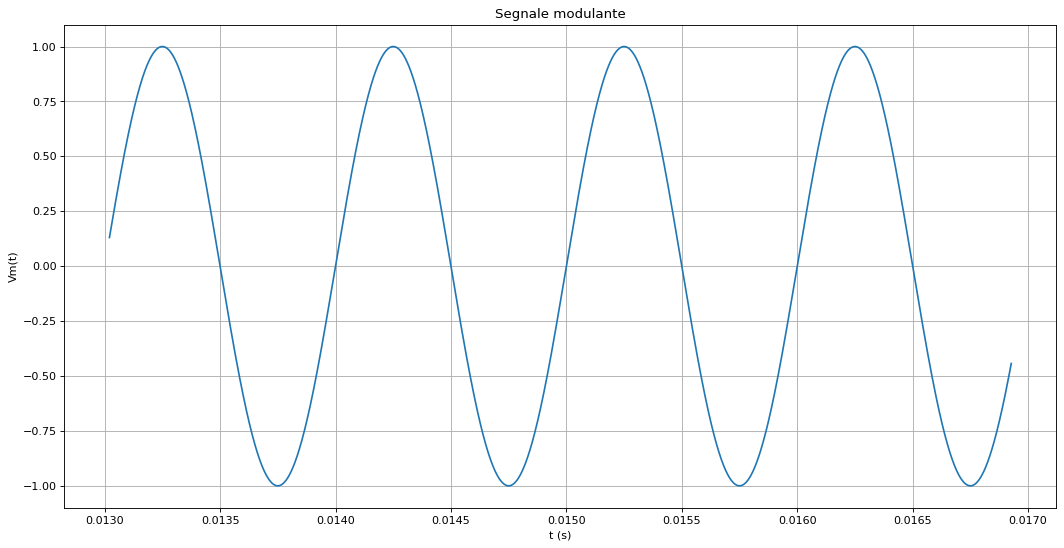

In [113]:
# Modulator signal
modulator = np.sin(2.0 * np.pi * MODULATOR_FREQUENCY * time) * MODULATION_INDEX

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale modulante')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], modulator[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('Vm(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/modulante.png')

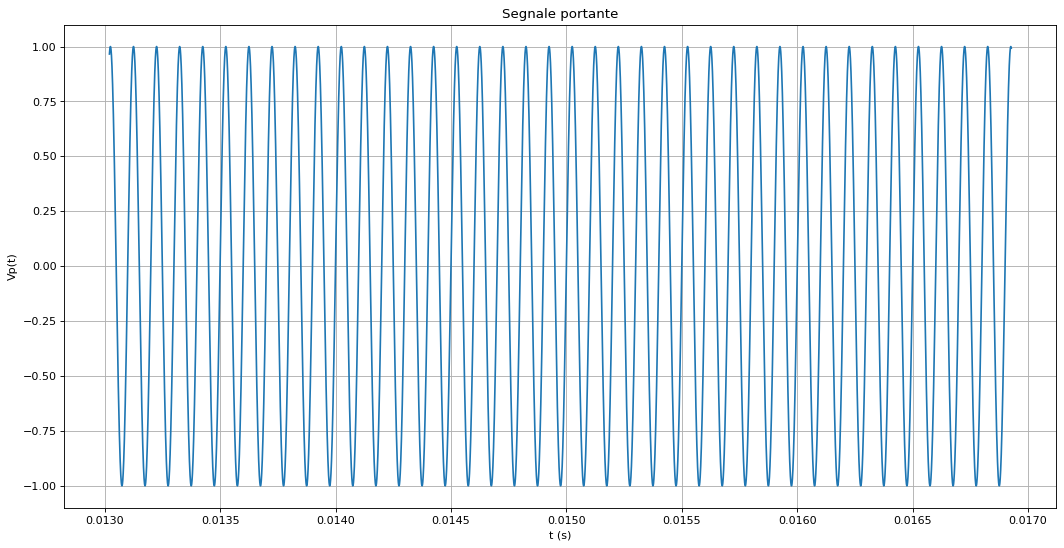

In [114]:
# Carrier signal
carrier = np.sin(2.0 * np.pi * CARRIER_FREQUENCY * time)

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale portante')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], carrier[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('Vp(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/portante.png')

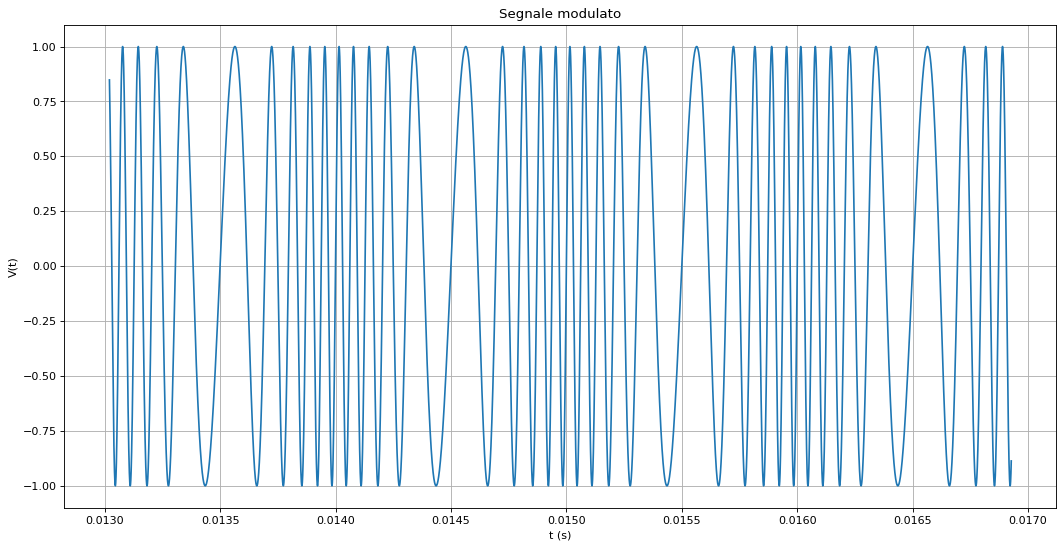

In [115]:
# Modulated signal
modulated = np.zeros_like(modulator)

for i, t in enumerate(time):
    modulated[i] = np.sin(2.0 * np.pi * (CARRIER_FREQUENCY * t + modulator[i]))

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale modulato')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], modulated[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/modulato.png')

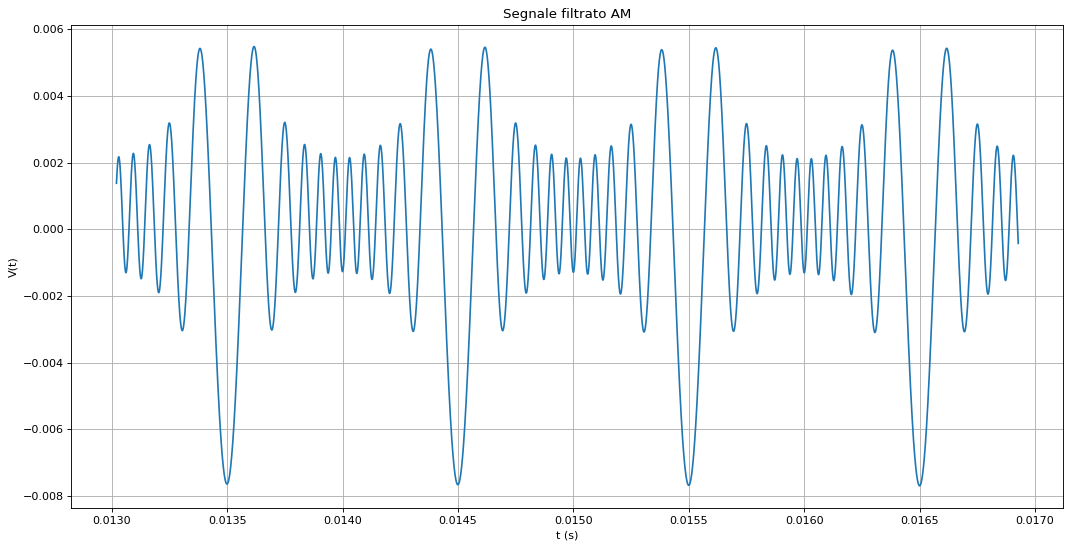

In [116]:
# Filtered signal
filtered = np.zeros_like(modulated)

a = 1 / (2 * np.pi * CARRIER_FREQUENCY * 0.7)

filtered[0] = a * modulated[0]
for i in range(1, len(modulated)):
    filtered[i] = filtered[i - 1] + a * (modulated[i] - filtered[i - 1])

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale filtrato AM')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], filtered[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/filtrato.png')

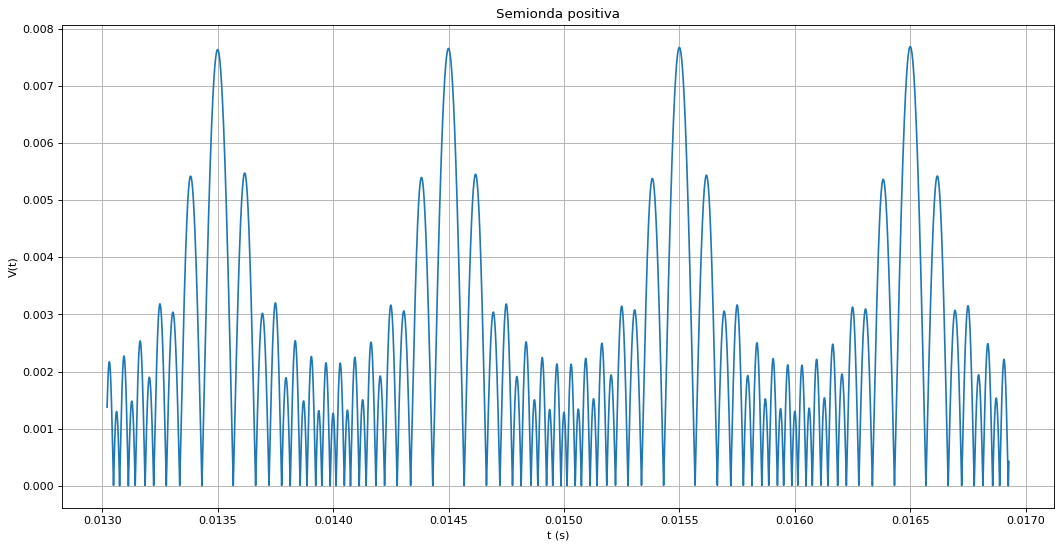

In [117]:
# Positive signal
positive = np.zeros_like(filtered)

for i, value in enumerate(filtered):
    positive[i] = abs(value)

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Semionda positiva')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], positive[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/positivo.png')

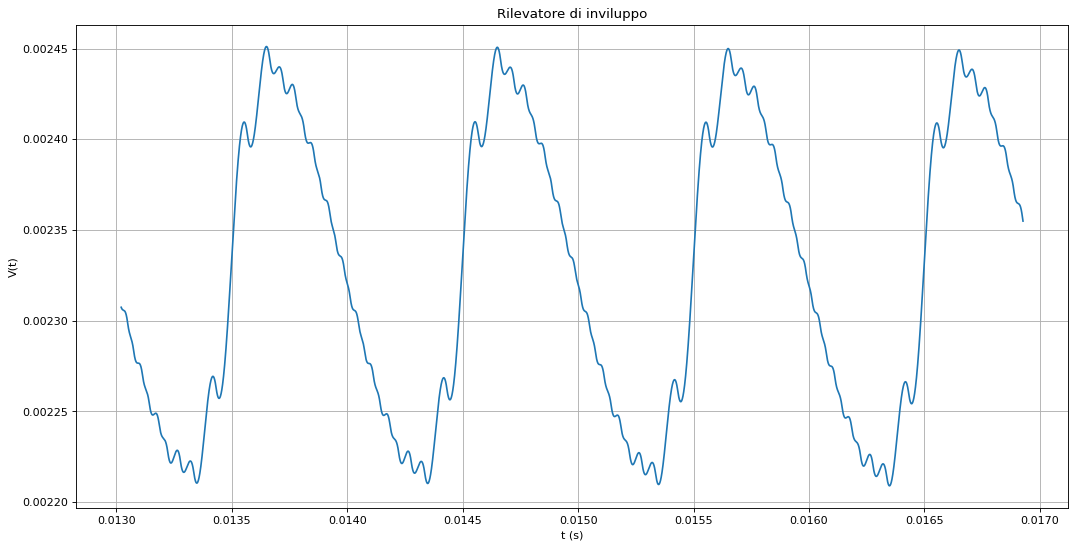

In [145]:
# Rilevatore di inviluppo
envelope = np.zeros_like(filtered)

a = 1 / (2 * np.pi * MODULATOR_FREQUENCY * 3)

envelope[0] = a * positive[0]
for i in range(1, len(positive)):
    envelope[i] = envelope[i - 1] + a * (positive[i] - envelope[i - 1])

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Rilevatore di inviluppo')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], envelope[PLOT_OFFSET:PLOT_SAMPLES])
# plt.plot(time, envelope)
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.savefig('doc/images/inviluppo.png')